In [1]:
%matplotlib inline

from sklearn.datasets import load_iris
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from math import *
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# On charge le set de donnees iris de sklearn

iris = load_iris()

In [2]:
# On regarde le set de donnees et ses differents attributs

print(iris)
print(iris.data)
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

{'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
 

In [3]:
# On regarde la forme des donnees et les valeurs min et max de chaque colonne pour l'initialisation des centres

print(len(iris.data))
print(iris.data.shape)
print(iris.data[:,0].min())
print(iris.data[:,0].max())
print(iris.data[:,1].min())
print(iris.data[:,1].max())
print(iris.data[:,2].min())
print(iris.data[:,2].max())
print(iris.data[:,3].min())
print(iris.data[:,3].max())

150
(150, 4)
4.3
7.9
2.0
4.4
1.0
6.9
0.1
2.5


In [4]:
# Fonction pour initialiser les centres dans l'algorithme k-means, qui renvoie un numpy arrray de dimension (K,4)

def init(K):
    column0 = 4.0*np.random.rand(K,1)+4.0
    column1 = 2.5*np.random.rand(K,1)+2.0
    column2 = 6.0*np.random.rand(K,1)+1.0
    column3 = 2.5*np.random.rand(K,1)
    return np.concatenate((column0, column1, column2, column3), axis = 1)

centers = init(3)

centers.shape

(3, 4)

In [5]:
# Fonction calculant la distance entre 2 points de meme dimension

def distance(x1, x2):
    dist = 0
    for i in range(len(x1)):
        dist += (x1[i]-x2[i])**2
    return sqrt(dist)

print(distance(centers[0], iris.data[0]))

x1 = np.zeros(3)
x2 = np.ones(3)
print(distance(x1,x2))
print(sqrt(3))

4.964019992751171
1.7320508075688772
1.7320508075688772


In [6]:
# Fonction permettant de trouver le centre le plus proche d'un point x quelconque, elle renvoie l'indice du centre dans le numpy array centers

def min_dist(x, centers):
    mini = distance(x, centers[0])
    mini_index = 0
    for i in range(1,len(centers)):
        if mini>distance(x, centers[i]):
            mini = distance(x, centers[i])
            mini_index = i
    return mini_index

for i in range(20):
    print(min_dist(iris.data[i], centers))

x3 = 2*np.ones(3)
list_test = [x2,x3]
print(min_dist(x1, list_test))

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0


In [7]:
# Fonction qui fait le partitionnement des donnees a chaque centre le plus proche
# elle renvoie la liste clusters de la taille du nombre de donnes contenant les indices des centres les plus proches, correspondant aux clusters
# et la taille de chaque clusters dans une liste clusters_size

def partitionning(data, centers):
    clusters = []
    clusters_size = np.zeros(len(centers))
    for i in range(len(data)):
        j=min_dist(data[i], centers)
        clusters.append(j)
        clusters_size[j]+=1
    return clusters, clusters_size

clusters, clusters_size = partitionning(iris.data, centers)
print(len(clusters))
print(clusters)
print(clusters_size)

150
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]
[  7.  59.  84.]


In [8]:
# Fonction qui met a jour les centres en les remplacant par les barycentres de chaque cluster

def update_centers(data, centers, clusters, clusters_size):
    for i in range(len(centers)):
        if clusters_size[i]!=0:
            new_center = np.zeros(len(data[0]))
            for j in range(len(clusters)):
                if clusters[j]==i:
                    new_center += data[j]
            new_center *= 1.0/clusters_size[i]
            centers[i] = new_center

update_centers(iris.data, centers, clusters, clusters_size)

In [9]:
# Fonction qui retourne True si chaque element x1[i][j] du numpy array x1 est egal a chaque element x2[i][j] du numpy array x2
# Utile pour savoir quand s'arreter dans l'algorithme k-means

def equal(x1,x2):
    for i in range(len(x1)):
        for j in range(len(x1[i])):
            if x1[i][j]!=x2[i][j]:
                return False
    return True

In [10]:
# Fonction k-means reutilisant les precedentes fonctions, renvoyant les centres, les clusters et les tailles des clusters

def K_means(data, K):
    centers = init(K)
    clusters, clusters_size = partitionning(data, centers)
    centers_update = centers
    update_centers(data, centers_update, clusters, clusters_size)
    while equal(centers_update,centers)==False:
        centers = centers_update
        clusters, clusters_size = partitionning(data, centers)
        update_centers(data, centers_update, clusters, clusters_size)
    return centers, clusters, clusters_size

# On teste avec 5 initialisations differentes

centers0, clusters0, clusters_size0 = K_means(iris.data, 3)
centers1, clusters1, clusters_size1 = K_means(iris.data, 3)
centers2, clusters2, clusters_size2 = K_means(iris.data, 3)
centers3, clusters3, clusters_size3 = K_means(iris.data, 3)
centers4, clusters4, clusters_size4 = K_means(iris.data, 3)

In [11]:
# On regarde les tailles des clusters dans chaque essai et les vraie classes des donnees

print(clusters_size0)
print(clusters_size1)
print(clusters_size2)
print(clusters_size3)
print(clusters_size4)

print(iris.target)

[ 30.  48.  72.]
[ 53.  51.  46.]
[ 43.  51.  56.]
[ 80.  70.   0.]
[ 91.  51.   8.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
# On applique la methode k-means++ de sklearn a nos donnees

kmeans = KMeans(n_clusters=3, random_state=0).fit(iris.data)

real_clusters_size = np.zeros(3)
for i in kmeans.labels_:
    real_clusters_size[int(i)] += 1

print(real_clusters_size)

[ 62.  50.  38.]


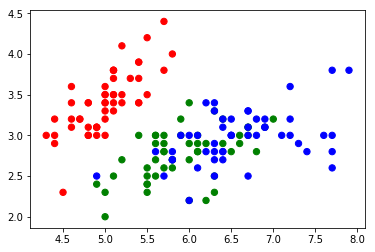

In [13]:
# On affiche l'epaisseur des sepales en fonction de leurs longueur pour observer la vraie repartition des classes
# et celles dans nos differents essais de k-means

colormap=np.array(['Red','green','blue'])
plt.scatter(iris.data[:,0], iris.data[:,1],c=colormap[iris.target],s=40)
plt.show()

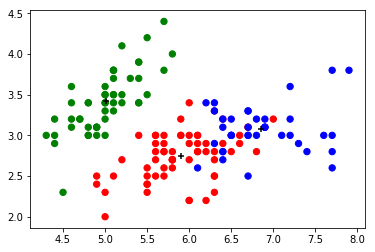

In [14]:
plt.scatter(iris.data[:,0], iris.data[:,1],c=colormap[kmeans.labels_],s=40)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="k", marker="+")
plt.show()

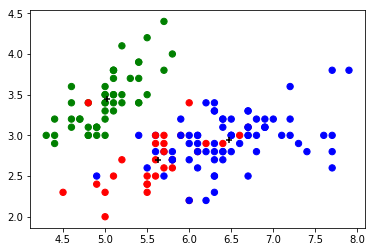

In [15]:
plt.scatter(iris.data[:,0], iris.data[:,1],c=colormap[clusters0],s=40)
plt.scatter(centers0[:,0], centers0[:,1], c="k", marker="+")
plt.show()

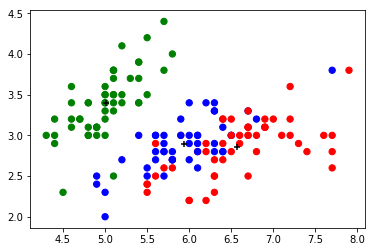

In [16]:
plt.scatter(iris.data[:,0], iris.data[:,1],c=colormap[clusters1],s=40)
plt.scatter(centers1[:,0], centers1[:,1], c="k", marker="+")
plt.show()

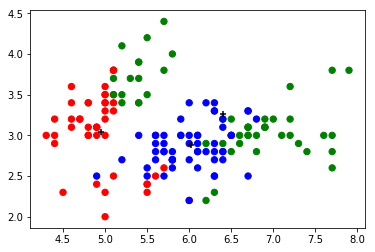

In [17]:
plt.scatter(iris.data[:,0], iris.data[:,1],c=colormap[clusters2],s=40)
plt.scatter(centers2[:,0], centers2[:,1], c="k", marker="+")
plt.show()

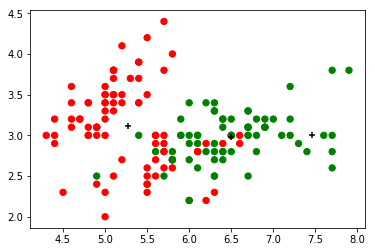

In [18]:
plt.scatter(iris.data[:,0], iris.data[:,1],c=colormap[clusters3],s=40)
plt.scatter(centers3[:,0], centers3[:,1], c="k", marker="+")
plt.show()

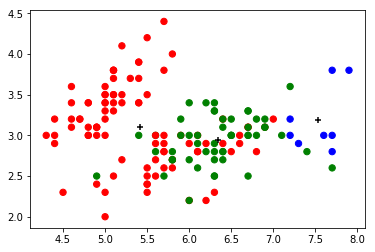

In [19]:
plt.scatter(iris.data[:,0], iris.data[:,1],c=colormap[clusters4],s=40)
plt.scatter(centers4[:,0], centers4[:,1], c="k", marker="+")
plt.show()

In [20]:
# On calcule l'erreur quadratique de nos differents essais

def err_quadr(data,clusters,centers):
    J=0
    for i in range(len(centers)):
        for j in range(len(clusters)):
            if clusters[j]==i:
                J += distance(data[j],centers[i])**2
    return J

print(clusters_size0)
print(clusters_size1)
print(clusters_size2)
print(clusters_size3)
print(clusters_size4)

print(err_quadr(iris.data,clusters0,centers0))
print(err_quadr(iris.data,clusters1,centers1))
print(err_quadr(iris.data,clusters2,centers2))
print(err_quadr(iris.data,clusters3,centers3))
print(err_quadr(iris.data,clusters4,centers4))

[ 30.  48.  72.]
[ 53.  51.  46.]
[ 43.  51.  56.]
[ 80.  70.   0.]
[ 91.  51.   8.]
110.60404166666666
142.68108012031726
369.18360090547867
254.50610714285722
292.8568492781726


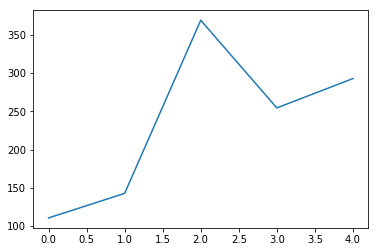

In [21]:
# On affiche les valeurs d'erreur quadratique pour nos 5 essais aleatoires

J0 = err_quadr(iris.data,clusters0,centers0)
J1 = err_quadr(iris.data,clusters1,centers1)
J2 = err_quadr(iris.data,clusters2,centers2)
J3 = err_quadr(iris.data,clusters3,centers3)
J4 = err_quadr(iris.data,clusters4,centers4)

plt.plot([0,1,2,3,4], [J0,J1,J2,J3,J4])
plt.show()

In [22]:
# On applique k-means++ pour k allant de 1 a 6

kmeans_k1 = KMeans(n_clusters=1, init="k-means++", random_state=None).fit(iris.data)
kmeans_k2 = KMeans(n_clusters=2, init="k-means++", random_state=None).fit(iris.data)
kmeans_k3 = KMeans(n_clusters=3, init="k-means++", random_state=None).fit(iris.data)
kmeans_k4 = KMeans(n_clusters=4, init="k-means++", random_state=None).fit(iris.data)
kmeans_k5 = KMeans(n_clusters=5, init="k-means++", random_state=None).fit(iris.data)
kmeans_k6 = KMeans(n_clusters=6, init="k-means++", random_state=None).fit(iris.data)

real_clusters_size_k1 = 150*np.ones(1)

real_clusters_size_k2 = np.zeros(2)
for i in kmeans_k2.labels_:
    real_clusters_size_k2[int(i)] += 1
    
real_clusters_size_k3 = np.zeros(3)
for i in kmeans_k3.labels_:
    real_clusters_size_k3[int(i)] += 1
    
real_clusters_size_k4 = np.zeros(4)
for i in kmeans_k4.labels_:
    real_clusters_size_k4[int(i)] += 1
    
real_clusters_size_k5 = np.zeros(5)
for i in kmeans_k5.labels_:
    real_clusters_size_k5[int(i)] += 1
    
real_clusters_size_k6 = np.zeros(6)
for i in kmeans_k6.labels_:
    real_clusters_size_k6[int(i)] += 1

print(real_clusters_size_k1)    
print(real_clusters_size_k2)
print(real_clusters_size_k3)
print(real_clusters_size_k4)
print(real_clusters_size_k5)
print(real_clusters_size_k6)

[ 150.]
[ 97.  53.]
[ 38.  50.  62.]
[ 32.  50.  40.  28.]
[ 24.  50.  25.  12.  39.]
[ 39.  23.  24.  12.  27.  25.]


680.8243999999995
152.36870647733897
78.94084142614608
57.317873214285726
46.53558205128205
38.93096304967174


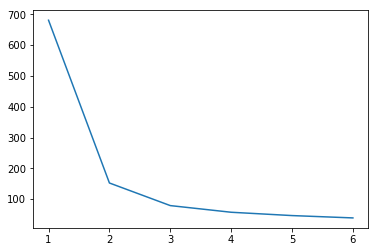

In [23]:
# On observe l'evolution de l'erreur quadratique en fonction de k

J_k1 = err_quadr(iris.data, kmeans_k1.labels_, kmeans_k1.cluster_centers_)
J_k2 = err_quadr(iris.data, kmeans_k2.labels_, kmeans_k2.cluster_centers_)
J_k3 = err_quadr(iris.data, kmeans_k3.labels_, kmeans_k3.cluster_centers_)
J_k4 = err_quadr(iris.data, kmeans_k4.labels_, kmeans_k4.cluster_centers_)
J_k5 = err_quadr(iris.data, kmeans_k5.labels_, kmeans_k5.cluster_centers_)
J_k6 = err_quadr(iris.data, kmeans_k6.labels_, kmeans_k6.cluster_centers_)

print(J_k1)
print(J_k2)
print(J_k3)
print(J_k4)
print(J_k5)
print(J_k6)

K = [1,2,3,4,5,6]
J = [J_k1,J_k2,J_k3,J_k4,J_k5, J_k6]

plt.plot(K, J)
plt.show()

In [24]:
# On calcule l'indice de Davies-Bouldin en le decomposant en 3 fonctions

# D'abord les termes S

def S(data,clusters,clusters_size,i,centers):
    S=0
    for n in range(len(clusters)):
        if clusters[n]==i:
            S=S+distance(data[n],centers[i])
    S=S/(clusters_size[i])
    return S

# Ensuite chaque terme de la somme

def DBterm(data,clusters,clusters_size,i,centers):
    DBterm=0
    for n in range (len(centers)):
        if n!=i:
            DBterm=max(DBterm,(S(data,clusters,clusters_size,i,centers)+S(data,clusters,clusters_size,n,centers))/(distance(centers[i],centers[n])))
    return DBterm

# L'indice final

def DB(data,clusters,clusters_size,centers):
    DB=0
    for i in range (len(centers)):
        DB=DB+DBterm(data,clusters,clusters_size,i,centers)
    DB=DB/len(centers)
    return DB

DB0 = DB(iris.data,clusters0,clusters_size0,centers0)

print(DB0)

0.733916346083


In [25]:
# On recalcule l'indice DB en changeant le calcul des termes S, maintenant on prend p=2 dans la formule generale 
# ce qui correspond plus a un ecart-type. Mais on observe des resultats tres similaires.

def S_2(data,clusters,clusters_size,i,centers):
    S=0
    for n in range(len(clusters)):
        if clusters[n]==i:
            S=S+distance(data[n],centers[i])**2
    S=sqrt(S/(clusters_size[i]))
    return S

def DBterm_2(data,clusters,clusters_size,i,centers):
    DBterm=0
    for n in range (len(centers)):
        if n!=i:
            DBterm=max(DBterm,(S_2(data,clusters,clusters_size,i,centers)+S_2(data,clusters,clusters_size,n,centers))/(distance(centers[i],centers[n])))
    return DBterm


def DB_2(data,clusters,clusters_size,centers):
    DB=0
    for i in range (len(centers)):
        DB=DB+DBterm_2(data,clusters,clusters_size,i,centers)
    DB=DB/len(centers)
    return DB

DB0_2 = DB_2(iris.data,clusters0,clusters_size0,centers0)

print(DB0_2)

0.8768067779626968


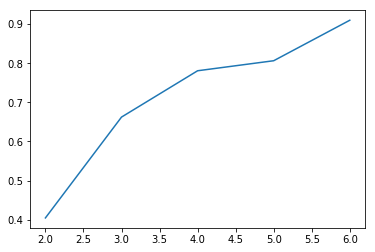

In [26]:
# On regarde l'evolution de l'indice DB en fonction de k pour la methode k-means++

DBB_k2 = DB(iris.data,kmeans_k2.labels_,real_clusters_size_k2,kmeans_k2.cluster_centers_)
DBB_k3 = DB(iris.data,kmeans_k3.labels_,real_clusters_size_k3,kmeans_k3.cluster_centers_)
DBB_k4 = DB(iris.data,kmeans_k4.labels_,real_clusters_size_k4,kmeans_k4.cluster_centers_)
DBB_k5 = DB(iris.data,kmeans_k5.labels_,real_clusters_size_k5,kmeans_k5.cluster_centers_)
DBB_k6 = DB(iris.data,kmeans_k6.labels_,real_clusters_size_k6,kmeans_k6.cluster_centers_)


K = [2,3,4,5,6]
DBBB = [DBB_k2,DBB_k3,DBB_k4,DBB_k5,DBB_k6]

plt.plot(K, DBBB)
plt.show()

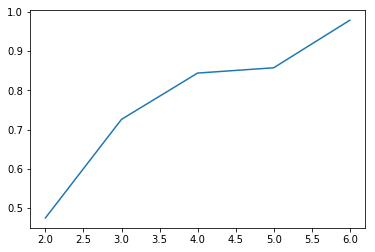

In [27]:
# On regarde de meme l'evolution de l'indice DB en fonction de k pour la methode k-means++ avec la formule 2

DBB_2_k2 = DB_2(iris.data,kmeans_k2.labels_,real_clusters_size_k2,kmeans_k2.cluster_centers_)
DBB_2_k3 = DB_2(iris.data,kmeans_k3.labels_,real_clusters_size_k3,kmeans_k3.cluster_centers_)
DBB_2_k4 = DB_2(iris.data,kmeans_k4.labels_,real_clusters_size_k4,kmeans_k4.cluster_centers_)
DBB_2_k5 = DB_2(iris.data,kmeans_k5.labels_,real_clusters_size_k5,kmeans_k5.cluster_centers_)
DBB_2_k6 = DB_2(iris.data,kmeans_k6.labels_,real_clusters_size_k6,kmeans_k6.cluster_centers_)


K = [2,3,4,5,6]
DBBB_2 = [DBB_2_k2,DBB_2_k3,DBB_2_k4,DBB_2_k5,DBB_2_k6]

plt.plot(K, DBBB_2)
plt.show()

In [28]:
# Fonction qui renvoie un numpy array contenant les coordonnees du barycentre d'un ensemble de donnees

def barycentre(data):
    G=np.zeros(len(data[0]))
    for i in range(len(data)):
        G += data[i]
    G = G/len(data)
    return G

print(barycentre(iris.data)) 

[ 5.84333333  3.054       3.75866667  1.19866667]


In [29]:
# Fonction appliquant la methode global k-means

def global_K_means(data, K):
    # initialisation avec le premier centre barycentre des donnees
    C1 = np.reshape(barycentre(data), (1,len(data[0])))
    centers = C1
    new_centers = []
    for n in range(K-1):
        # a chaque iteration, on teste chaque donnee en la rajoutant aux centres, partitionnant les donnees,
        # calculant l'erreur quadratique correspondant, et on garde le point dont l'erreur quadratique est minimale
        new_centers.append(data[0])
        centers2 = np.append(centers, np.reshape(new_centers[n], (1,len(data[0]))), axis=0)
        clusters, clusters_size = partitionning(data, centers2)
        J = err_quadr(data,clusters,centers2)
        for i in data:
            centers2 = np.append(centers, np.reshape(i, (1,len(data[0]))), axis=0)
            clusters, clusters_size = partitionning(data, centers2)
            if J > err_quadr(data,clusters,centers2):
                J = err_quadr(data,clusters,centers2)
                new_centers[n] = i
        # et on applique k-means classique quand on trouve le centre supplementaire a chaque etape jusqu'a la convergence
        # jusqu'a ce qu'on ait le nombre de centres souhaites
        centers = np.append(centers,  np.reshape(new_centers[n], (1,len(data[0]))), axis=0)
        clusters, clusters_size = partitionning(data, centers)
        centers_update = centers
        update_centers(data, centers_update, clusters, clusters_size)
        while equal(centers_update,centers)==False:
                centers = centers_update
                clusters, clusters_size = partitionning(data, centers)
                update_centers(data, centers_update, clusters, clusters_size)
    return centers, clusters, clusters_size

centers0_glob, clusters0_glob, clusters_size0_glob = global_K_means(iris.data, 3)

[ 72.  52.  26.]
88.58584401709399
0.659715364756


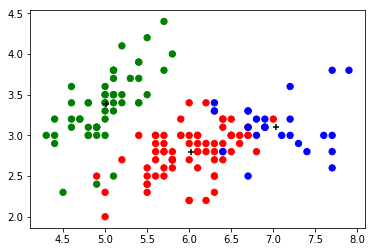

In [30]:
# on analyse le resultat obtenu par cette methode

print(clusters_size0_glob)
print(err_quadr(iris.data, clusters0_glob, centers0_glob))
print(DB(iris.data,clusters0_glob,clusters_size0_glob,centers0_glob))

plt.scatter(iris.data[:,0], iris.data[:,1],c=colormap[clusters0_glob],s=40)
plt.scatter(centers0_glob[:,0], centers0_glob[:,1], c="k", marker="+")
plt.show()

In [31]:
# On fait les etudes pour le choix de k avec cette methode

centers_glob_k2, clusters_glob_k2, clusters_size_glob_k2 = global_K_means(iris.data, 2)
centers_glob_k3, clusters_glob_k3, clusters_size_glob_k3 = global_K_means(iris.data, 3)
centers_glob_k4, clusters_glob_k4, clusters_size_glob_k4 = global_K_means(iris.data, 4)
centers_glob_k5, clusters_glob_k5, clusters_size_glob_k5 = global_K_means(iris.data, 5)
centers_glob_k6, clusters_glob_k6, clusters_size_glob_k6 = global_K_means(iris.data, 6)

print(clusters_size_glob_k2)
print(clusters_size_glob_k3)
print(clusters_size_glob_k4)
print(clusters_size_glob_k5)
print(clusters_size_glob_k6)

[ 100.   50.]
[ 72.  52.  26.]
[ 43.  50.  33.  24.]
[ 43.  50.  24.  25.   8.]
[ 40.  35.  24.  26.  10.  15.]


680.8243999999995
155.0364
88.58584401709399
57.7220235024665
47.78859263565891
39.934094322344315


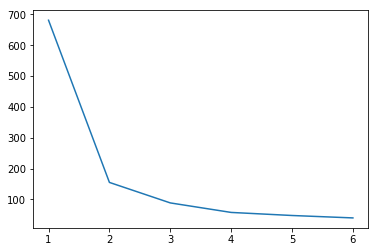

In [32]:
# Methode de l'erreur quadratique
# on se permet pour k=1 d'utiliser k-means++ car cela revient au meme, le seul centre est le barycentre

J_k1 = err_quadr(iris.data, kmeans_k1.labels_, kmeans_k1.cluster_centers_)
J_glob_k2 = err_quadr(iris.data, clusters_glob_k2, centers_glob_k2)
J_glob_k3 = err_quadr(iris.data, clusters_glob_k3, centers_glob_k3)
J_glob_k4 = err_quadr(iris.data, clusters_glob_k4, centers_glob_k4)
J_glob_k5 = err_quadr(iris.data, clusters_glob_k5, centers_glob_k5)
J_glob_k6 = err_quadr(iris.data, clusters_glob_k6, centers_glob_k6)

print(J_k1)
print(J_glob_k2)
print(J_glob_k3)
print(J_glob_k4)
print(J_glob_k5)
print(J_glob_k6)

K = [1,2,3,4,5,6]
J_glob = [J_k1,J_glob_k2,J_glob_k3,J_glob_k4,J_glob_k5, J_glob_k6]

plt.plot(K, J_glob)
plt.show()

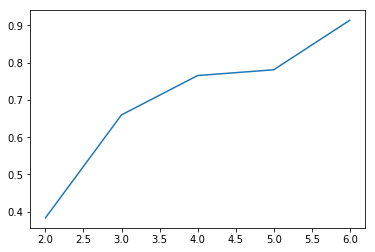

In [33]:
# Methode de DB

DB_glob_k2 = DB(iris.data,clusters_glob_k2,clusters_size_glob_k2,centers_glob_k2)
DB_glob_k3 = DB(iris.data,clusters_glob_k3,clusters_size_glob_k3,centers_glob_k3)
DB_glob_k4 = DB(iris.data,clusters_glob_k4,clusters_size_glob_k4,centers_glob_k4)
DB_glob_k5 = DB(iris.data,clusters_glob_k5,clusters_size_glob_k5,centers_glob_k5)
DB_glob_k6 = DB(iris.data,clusters_glob_k6,clusters_size_glob_k6,centers_glob_k6)

K_glob = [2,3,4,5,6]
DB_glob = [DB_glob_k2,DB_glob_k3,DB_glob_k4,DB_glob_k5,DB_glob_k6]

plt.plot(K_glob, DB_glob)
plt.show()

In [34]:
# Fonction renvoyant les indices des 2 elements les plus eloignes dans un ensemble de donnees

def max_dist(data):
    i,j = 0,1
    maxi = distance(data[0],data[1])
    for k in range(len(data)-1):
        for l in range(k+1,len(data)):
            if distance(data[k],data[l]) > maxi:
                i,j = k,l
                maxi = distance(data[k],data[l])
    return i,j

# Fonction renvoyant l'indice de l'element mal classe dans un ensemble de donnees partitionne
# celui qui est le plus eloigne de son centre

def mal_classe(data, centers, clusters):
    i = 0
    maxi = distance(data[0],centers[clusters[0]])
    for k in range(1,len(data)):
        if distance(data[k],centers[clusters[k]]) > maxi:
            i = k
            maxi = distance(data[k],centers[clusters[k]])
    return i

# Fonction renvoyant le numpy array des centres par l'initialisation par le mal classe

def init_mal_classe(data, K):
    i,j = max_dist(data)
    C1, C2 = np.reshape(data[i], (1,len(data[0]))), np.reshape(data[j], (1,len(data[0])))
    centers = np.append(C1, C2, axis=0)
    for n in range(K-2):
        clusters, clusters_size = partitionning(data, centers)
        k = mal_classe(data, centers, clusters)
        centers = np.append(centers, np.reshape(data[k], (1,len(data[0]))), axis=0)
    return centers

# Fonction appliquant k-means apres l'initialisation par le mal classe

def K_means_mal_classe(data, K):
    centers = init_mal_classe(data, K)
    clusters, clusters_size = partitionning(data, centers)
    centers_update = centers
    update_centers(data, centers_update, clusters, clusters_size)
    while equal(centers_update,centers)==False:
        centers = centers_update
        clusters, clusters_size = partitionning(data, centers)
        update_centers(data, centers_update, clusters, clusters_size)
    return centers, clusters, clusters_size

centers0_mal_cl, clusters0_mal_cl, clusters_size0_mal_cl = K_means_mal_classe(iris.data, 3)

[ 50.  28.  72.]
84.98710634920634
0.653971634375
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2]


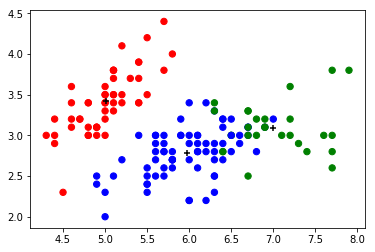

In [35]:
# On analyse les resultats par cette methode

print(clusters_size0_mal_cl)
print(err_quadr(iris.data, clusters0_mal_cl, centers0_mal_cl))
print(DB(iris.data,clusters0_mal_cl,clusters_size0_mal_cl,centers0_mal_cl))

print(clusters0_mal_cl)
plt.scatter(iris.data[:,0], iris.data[:,1],c=colormap[clusters0_mal_cl],s=40)
plt.scatter(centers0_mal_cl[:,0], centers0_mal_cl[:,1], c="k", marker="+")
plt.show()

In [36]:
# On fait les etudes pour le choix de k avec cette methode

centers_mal_cl_k2, clusters_mal_cl_k2, clusters_size_mal_cl_k2 = K_means_mal_classe(iris.data, 2)
centers_mal_cl_k3, clusters_mal_cl_k3, clusters_size_mal_cl_k3 = K_means_mal_classe(iris.data, 3)
centers_mal_cl_k4, clusters_mal_cl_k4, clusters_size_mal_cl_k4 = K_means_mal_classe(iris.data, 4)
centers_mal_cl_k5, clusters_mal_cl_k5, clusters_size_mal_cl_k5 = K_means_mal_classe(iris.data, 5)
centers_mal_cl_k6, clusters_mal_cl_k6, clusters_size_mal_cl_k6 = K_means_mal_classe(iris.data, 6)

print(clusters_size_mal_cl_k2)
print(clusters_size_mal_cl_k3)
print(clusters_size_mal_cl_k4)
print(clusters_size_mal_cl_k5)
print(clusters_size_mal_cl_k6)

[ 68.  82.]
[ 50.  28.  72.]
[ 50.  13.  33.  54.]
[ 33.  13.  33.  54.  17.]
[ 33.   8.  32.  35.  17.  25.]


198.4850573888091
84.98710634920634
67.73233732193734
60.44858616329205
47.65243098421186


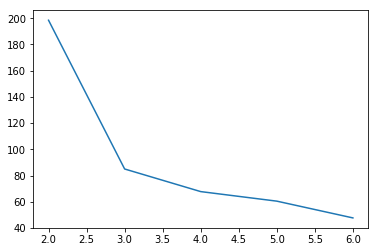

In [37]:
# Methode de l'erreur quadratique

J_mal_cl_k2 = err_quadr(iris.data, clusters_mal_cl_k2, centers_mal_cl_k2)
J_mal_cl_k3 = err_quadr(iris.data, clusters_mal_cl_k3, centers_mal_cl_k3)
J_mal_cl_k4 = err_quadr(iris.data, clusters_mal_cl_k4, centers_mal_cl_k4)
J_mal_cl_k5 = err_quadr(iris.data, clusters_mal_cl_k5, centers_mal_cl_k5)
J_mal_cl_k6 = err_quadr(iris.data, clusters_mal_cl_k6, centers_mal_cl_k6)

print(J_mal_cl_k2)
print(J_mal_cl_k3)
print(J_mal_cl_k4)
print(J_mal_cl_k5)
print(J_mal_cl_k6)

K = [2,3,4,5,6]
J_mal_cl = [J_mal_cl_k2,J_mal_cl_k3,J_mal_cl_k4,J_mal_cl_k5, J_mal_cl_k6]

plt.plot(K, J_mal_cl)
plt.show()

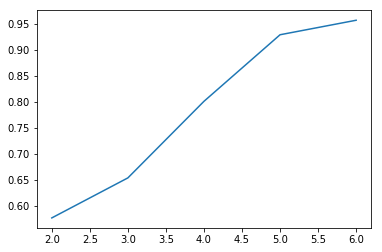

In [38]:
# Methode de DB

DB_mal_cl_k2 = DB(iris.data,clusters_mal_cl_k2,clusters_size_mal_cl_k2,centers_mal_cl_k2)
DB_mal_cl_k3 = DB(iris.data,clusters_mal_cl_k3,clusters_size_mal_cl_k3,centers_mal_cl_k3)
DB_mal_cl_k4 = DB(iris.data,clusters_mal_cl_k4,clusters_size_mal_cl_k4,centers_mal_cl_k4)
DB_mal_cl_k5 = DB(iris.data,clusters_mal_cl_k5,clusters_size_mal_cl_k5,centers_mal_cl_k5)
DB_mal_cl_k6 = DB(iris.data,clusters_mal_cl_k6,clusters_size_mal_cl_k6,centers_mal_cl_k6)

K_mal_cl = [2,3,4,5,6]
DB_mal_cl = [DB_mal_cl_k2,DB_mal_cl_k3,DB_mal_cl_k4,DB_mal_cl_k5,DB_mal_cl_k6]

plt.plot(K_mal_cl, DB_mal_cl)
plt.show()

In [39]:
# Fonction appliquant l'approche incrementale de k-means

def incr_K_means(data, K):
    # initialisation des 2 premiers centres avec les 2 elements les plus eloignes du set
    i,j = max_dist(data)
    C1, C2 = np.reshape(data[i], (1,len(data[0]))), np.reshape(data[j], (1,len(data[0])))
    centers = np.append(C1, C2, axis=0)
    clusters, clusters_size = partitionning(data, centers)
    for n in range(K-2):
        # a chaque iteration on prend le mal classe et on applique k-means
        # jusqu'a ce qu'on ait le nombre de centres souhaites
        k = mal_classe(data, centers, clusters)
        centers = np.append(centers, np.reshape(data[k], (1,len(data[0]))), axis=0)
        clusters, clusters_size = partitionning(data, centers)
        centers_update = centers
        update_centers(data, centers_update, clusters, clusters_size)
        while equal(centers_update,centers)==False:
                centers = centers_update
                clusters, clusters_size = partitionning(data, centers)
                update_centers(data, centers_update, clusters, clusters_size)
    return centers, clusters, clusters_size

centers0_incr, clusters0_incr, clusters_size0_incr = incr_K_means(iris.data, 3)

[ 50.  28.  72.]
84.98710634920634
0.653971634375
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2]


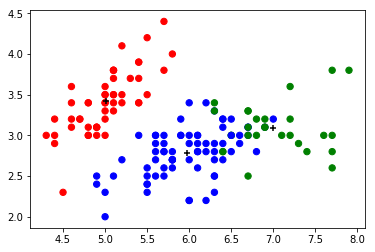

In [40]:
# On analyse les resultats par cette methode

print(clusters_size0_incr)
print(err_quadr(iris.data, clusters0_incr, centers0_incr))
print(DB(iris.data,clusters0_incr,clusters_size0_incr,centers0_incr))

print(clusters0_incr)
plt.scatter(iris.data[:,0], iris.data[:,1],c=colormap[clusters0_incr],s=40)
plt.scatter(centers0_incr[:,0], centers0_incr[:,1], c="k", marker="+")
plt.show()

In [41]:
# On fait les etudes pour le choix de k avec cette methode

centers_incr_k2, clusters_incr_k2, clusters_size_incr_k2 = incr_K_means(iris.data, 2)
centers_incr_k3, clusters_incr_k3, clusters_size_incr_k3 = incr_K_means(iris.data, 3)
centers_incr_k4, clusters_incr_k4, clusters_size_incr_k4 = incr_K_means(iris.data, 4)
centers_incr_k5, clusters_incr_k5, clusters_size_incr_k5 = incr_K_means(iris.data, 5)
centers_incr_k6, clusters_incr_k6, clusters_size_incr_k6 = incr_K_means(iris.data, 6)

print(clusters_size_incr_k2)
print(clusters_size_incr_k3)
print(clusters_size_incr_k4)
print(clusters_size_incr_k5)
print(clusters_size_incr_k6)

[ 68.  82.]
[ 50.  28.  72.]
[ 50.  35.  56.   9.]
[ 50.  29.  51.  14.   6.]
[ 50.  27.  44.  19.   9.   1.]


734.16
84.98710634920634
64.28230873015872
51.884061257606504
47.16268380294169


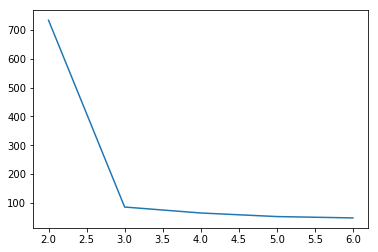

In [42]:
# Methode de l'erreur quadratique

J_incr_k2 = err_quadr(iris.data, clusters_incr_k2, centers_incr_k2)
J_incr_k3 = err_quadr(iris.data, clusters_incr_k3, centers_incr_k3)
J_incr_k4 = err_quadr(iris.data, clusters_incr_k4, centers_incr_k4)
J_incr_k5 = err_quadr(iris.data, clusters_incr_k5, centers_incr_k5)
J_incr_k6 = err_quadr(iris.data, clusters_incr_k6, centers_incr_k6)

print(J_incr_k2)
print(J_incr_k3)
print(J_incr_k4)
print(J_incr_k5)
print(J_incr_k6)

K = [2,3,4,5,6]
J_incr = [J_incr_k2,J_incr_k3,J_incr_k4,J_incr_k5, J_incr_k6]

plt.plot(K, J_incr)
plt.show()

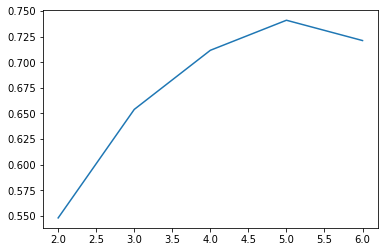

In [43]:
# Methode de DB

DB_incr_k2 = DB(iris.data,clusters_incr_k2,clusters_size_incr_k2,centers_incr_k2)
DB_incr_k3 = DB(iris.data,clusters_incr_k3,clusters_size_incr_k3,centers_incr_k3)
DB_incr_k4 = DB(iris.data,clusters_incr_k4,clusters_size_incr_k4,centers_incr_k4)
DB_incr_k5 = DB(iris.data,clusters_incr_k5,clusters_size_incr_k5,centers_incr_k5)
DB_incr_k6 = DB(iris.data,clusters_incr_k6,clusters_size_incr_k6,centers_incr_k6)

K_incr = [2,3,4,5,6]
DB_incr = [DB_incr_k2,DB_incr_k3,DB_incr_k4,DB_incr_k5,DB_incr_k6]

plt.plot(K_incr, DB_incr)
plt.show()

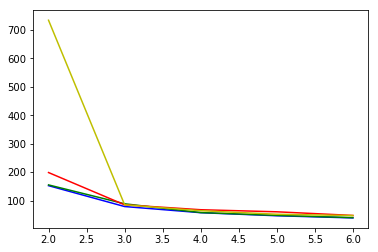

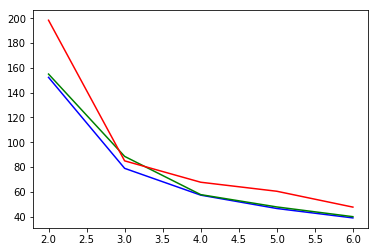

In [44]:
# On compare les differentes methodes en evoluant k

# Par l'erreur quadratique

K = [2,3,4,5,6]

J = [J_k2,J_k3,J_k4,J_k5, J_k6]

J_glob = [J_glob_k2,J_glob_k3,J_glob_k4,J_glob_k5, J_glob_k6]

J_mal_cl = [J_mal_cl_k2,J_mal_cl_k3,J_mal_cl_k4,J_mal_cl_k5, J_mal_cl_k6]

J_incr = [J_incr_k2,J_incr_k3,J_incr_k4,J_incr_k5, J_incr_k6]

plt.plot(K, J, "b")
plt.plot(K, J_glob, "g")
plt.plot(K, J_mal_cl, "r")
plt.plot(K, J_incr, "y")

plt.show()

plt.plot(K, J, "b")
plt.plot(K, J_glob, "g")
plt.plot(K, J_mal_cl, "r")

plt.show()

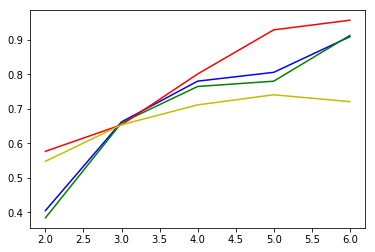

In [45]:
# Par le critère de DB

K = [2,3,4,5,6]

DBBB = [DBB_k2,DBB_k3,DBB_k4,DBB_k5,DBB_k6]

DB_glob = [DB_glob_k2,DB_glob_k3,DB_glob_k4,DB_glob_k5,DB_glob_k6]

DB_mal_cl = [DB_mal_cl_k2,DB_mal_cl_k3,DB_mal_cl_k4,DB_mal_cl_k5,DB_mal_cl_k6]

DB_incr = [DB_incr_k2,DB_incr_k3,DB_incr_k4,DB_incr_k5,DB_incr_k6]

plt.plot(K, DBBB, "b")
plt.plot(K_glob, DB_glob, "g")
plt.plot(K_mal_cl, DB_mal_cl, "r")
plt.plot(K_incr, DB_incr, "y")
plt.show()

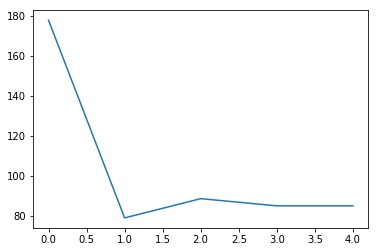

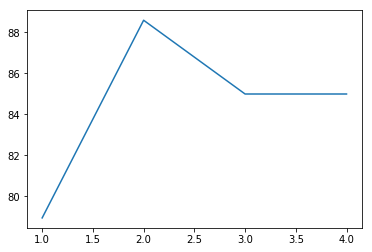

In [46]:
# On compare les differentes  methodes pour k=3, avec et sans un des meilleurs resultats aleatoires qu'on ait obtenu

# Par l'erreur quadratique

J_rand = 177.9083199730297

plt.plot([0,1,2,3,4],[J_rand, J_k3, J_glob_k3, J_mal_cl_k3, J_incr_k3])
plt.show()

plt.plot([1,2,3,4],[J_k3, J_glob_k3, J_mal_cl_k3, J_incr_k3])
plt.show()

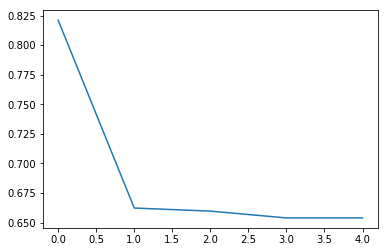

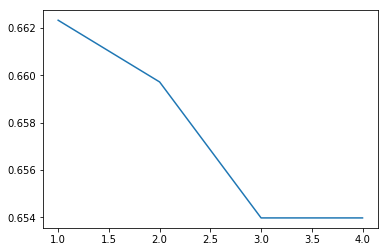

In [47]:
# Par le critère de DB

DB_rand = 0.821020412792

plt.plot([0,1,2,3,4],[DB_rand, DBB_k3, DB_glob_k3, DB_mal_cl_k3, DB_incr_k3])
plt.show()

plt.plot([1,2,3,4],[DBB_k3, DB_glob_k3, DB_mal_cl_k3, DB_incr_k3])
plt.show()